In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from __future__ import division
import math
from sklearn.linear_model import LinearRegression

In [2]:
sf = pd.read_csv("/Users/yinagu/Downloads/Historic_Secured_Property_Tax_Rolls.csv")

/Users/yinagu/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sf.head()

,Closed Roll Fiscal Year,Property Location,Neighborhood Code,Neighborhood Code Definition,Block and Lot Number,Volume Number,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,...,Closed Roll Homeowner Exemption Value,Current Sales Date,Closed Roll Assessed Fixtures Value,Closed Roll Assessed Improvement Value,Closed Roll Assessed Land Value,Closed Roll Assessed Personal Prop Value,Zipcode of Parcel,Supervisor District,Neighborhoods - Analysis Boundaries,Location
0,2008.0,0000 2530 BROADWAY 0000,07B,Pacific Heights,0561035,5,Z,Condominium,1905.0,1.0,...,7000.0,11/10/1987,0.0,728627.0,255013.0,0.0,94123.0,2.0,Pacific Heights,"(37.7940340294332, -122.43876013275)"
1,2008.0,1114 1108 CHURCH ST0000,05C,Noe Valley,3651002,24,A,Apartment,1908.0,4.0,...,0.0,NaN,0.0,65944.0,45891.0,0.0,94114.0,8.0,Noe Valley,"(37.7530509295886, -122.427855211117)"
2,2009.0,0000 0000 0000,08G,Telegraph Hill,0087028,1,V,Vacant Lot,NaN,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2007.0,0000 2625 24TH ST0000,09C,Inner ission,4264026,28,V,Vacant Lot,NaN,0.0,...,0.0,11/04/1940,0.0,0.0,875496.0,0.0,NaN,NaN,NaN,NaN
4,2013.0,0000 0000 BERRY ST0000,08H,North Waterfront,9900336,44,Y,Port Commission Property,NaN,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
len(sf)

1612110

In [5]:
########## Q2-1: What fraction of assessments are for properties of the most common class?
# The most common class is D
sf['Property Class Code'].value_counts().max()/sf['Property Class Code'].value_counts().sum()

0.47097598637581212

In [6]:
sf['Property Class Code'].describe()

count     1611252
unique        101
top             D
freq       758861
Name: Property Class Code, dtype: object

In [7]:
# Take only the latest assessment value for each property, 
# identified by the "Block and Lot Number" column.
sf.sort_values(by='Closed Roll Fiscal Year', axis = 0, inplace=True)
sf_unique = sf.drop_duplicates('Block and Lot Number', keep='last')

In [8]:
#  Consider only non-zero assessments
sf_unique_nonzero= sf_unique.loc[sf_unique['Closed Roll Assessed Improvement Value']!=0]

In [35]:
########## Q2-2: What is the median assessed improvement value?
print 'median is %.10f' %sf_unique_nonzero['Closed Roll Assessed Improvement Value'].median()

median is 209244.5000000000


In [29]:
########## Q2-3: Calculate the average improvement value (using only non-zero assessments) in each neighborhood.
avg_imp_ngb = sf_unique_nonzero.groupby('Neighborhood Code')['Closed Roll Assessed Improvement Value'].mean()
#  difference between the greatest and least average values
avg_imp_ngb.max()-avg_imp_ngb.min(dtype = np.float64)

5085780.383029256

In [11]:
########## Q2-4:What is the yearly growth rate of Land Values over the years covered by this data? 
# Take a simplistic model: the value is given by P=P0exp(rt), where t is measured in years. 
# A more complete model would give each property its own base price P(i)0. Estimate r
# over all assessments with a non-zero land value. (Hint: Consider using linear regression and logarithms.)
sf_land= sf[['Year Property Built','Closed Roll Fiscal Year','Closed Roll Assessed Land Value']
                    ].loc[sf['Closed Roll Assessed Land Value']!=0]

In [12]:
sf_land.dropna(axis=0, inplace = True)
sf_land.head()

,Year Property Built,Closed Roll Fiscal Year,Closed Roll Assessed Land Value
1073300,2004.0,2007.0,70506.0
1058055,1926.0,2007.0,715085.0
1058039,1908.0,2007.0,42925.0
1058029,1959.0,2007.0,30674.0
1058028,1983.0,2007.0,158395.0


In [13]:
# log(p) = r*x + log(p0)
#x = (sf_land['Closed Roll Fiscal Year']-sf_land['Year Property Built']).reshape(len(sf_land), 1)
x = (sf_land['Closed Roll Fiscal Year']-2007).reshape(len(sf_land), 1)
target = np.array([math.log(v) for v in sf_land['Closed Roll Assessed Land Value']]).reshape(len(sf_land),1)

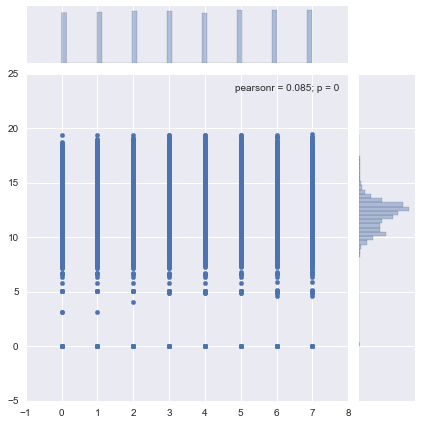

In [14]:
sns.jointplot(x, target, kind='scatter')

In [34]:
# Create linear regression model
lreg = LinearRegression()
lreg.fit(x, target)
print "The yearly growth rate of land values is: %.10f" %(lreg.coef_)

The yearly growth rate of land values is: 0.0463973914


In [16]:
print "The base price for all assessments is: %.9f" %math.exp(lreg.intercept_)

The base price for all assessments is: 140454.622901


In [17]:
########## Q2-5: We can use the property locations to estimate the areas of the neighborhoods. 
# Represent each as an ellipse with semi-axes given by a single standard deviation of 
# the longitude and latitude. What is the area, in square kilometers, of the largest 
# neighborhood measured in this manner? Be sure to filter out invalid coordinates.
sf_unique_loc = sf_unique.dropna(subset=['Location'], axis=0)
sf_unique_loc['lat'] = [float(loc[1:-1].split(',')[0]) for loc in sf_unique_loc['Location']]
sf_unique_loc['lng'] = [float(loc[1:-1].split(',')[1]) for loc in sf_unique_loc['Location']]

/Users/yinagu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yinagu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


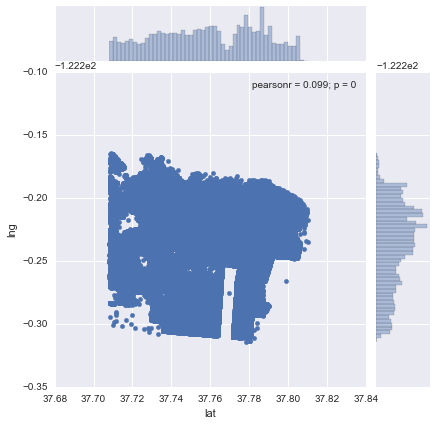

In [18]:
# Visulize the location data to spot any outlier
sns.jointplot('lat', 'lng', sf_unique_loc, kind='scatter')


In [19]:
# Calculte STD of latitude and longitude grouped by neighborhood
std_latlng_ngb = pd.DataFrame(sf_unique_loc.groupby('Neighborhood Code')[['lat','lng']].std())


In [36]:
# Each degree at the equator represents approximately 111.32 km
# Area of ellipe is pi * a * b (where a,b are semi-major/minor axis length)
deg2len = 111.32
std_latlng_ngb['area'] = math.pi* std_latlng_ngb['lat']* deg2len * std_latlng_ngb['lng'] * deg2len
print 'The area of the largest neighborhood is %.10f' %(std_latlng_ngb['area'].max()) 

The area of the largest neighborhood is 3.8446572598


In [21]:
######### Q2-6:
#What is the difference between the average number of units in buildings 
# build in or after 1950, and that for buildings built before 1950? 

sf['Number of Units'].describe()

count    1.612110e+06
mean     1.843129e+00
std      1.524191e+01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      4.000000e+03
Name: Number of Units, dtype: float64

In [22]:
# use the earliest record for each property
sf_unique_first = sf.drop_duplicates('Block and Lot Number', keep='first')
# buildings that have non-zero units
unit_nonzero = sf_unique_first.loc[sf_unique_first['Number of Units'] != 0]
# filter out the building with incorrect built year
unit_nonzero = unit_nonzero.loc[(unit_nonzero['Year Property Built']<2016) & (unit_nonzero['Year Property Built']>1776)]
unit_nonzero['Year Property Built'].describe()

count    163774.000000
mean       1936.927534
std          28.428480
min        1791.000000
25%        1913.000000
50%        1930.000000
75%        1953.000000
max        2015.000000
Name: Year Property Built, dtype: float64

In [37]:
# Create a boolean column indicate if building was built before 1950
unit_nonzero['1950'] = unit_nonzero['Year Property Built'] < 1950
df = pd.DataFrame(unit_nonzero.groupby('1950')['Number of Units'].mean())
print "The difference between the average number of units after and before 1950 is %.10f" %(df.ix[0]-df.ix[1])

The difference between the average number of units after and before 1950 is 0.4198568573


In [24]:
######### Q2-7:
#Considering only properties with non-zero numbers of bedrooms and units,
#calculate the average number of bedrooms per unit in each zip code.

sf_bed_unit = sf_unique.loc[(sf_unique['Number of Bedrooms'] !=0) & (sf_unique['Number of Units'] !=0)]
bed_unit_zip = pd.merge(
    pd.DataFrame(sf_bed_unit.groupby('Zipcode of Parcel')['Number of Bedrooms'].mean()),
    pd.DataFrame(sf_bed_unit.groupby('Zipcode of Parcel')['Number of Units'].mean()),
    left_index = True, right_index = True)
bed_unit_zip.head()

,Number of Bedrooms,Number of Units
Zipcode of Parcel,,
94102.0,7.118048,6.451759
94103.0,3.823460,3.105450
94105.0,1.519444,1.000000
94107.0,2.047434,1.090987
94108.0,2.868056,2.004630


In [38]:
bed_unit_zip['ratio']= bed_unit_zip['Number of Bedrooms'] / bed_unit_zip['Number of Units']
print 'The maximum ratio of the average bed per average unit in the zip code is %.10f' %bed_unit_zip['ratio'].max()

The maximum ratio of the average bed per average unit in the zip code is 3.8075601375


In [39]:
######## Q2-8:
#Estimate how built-up each zip code is by comparing the total property area to the total lot area. 
#What is the largest ratio of property area to surface area of all zip codes?
sf_prop_lot = sf_unique.loc[(sf_unique['Property Area in Square Feet'] !=0) 
                            & (sf_unique['Lot Area'] !=0)]
prop_lot_zip = pd.merge(
    pd.DataFrame(sf_prop_lot.groupby('Zipcode of Parcel')['Property Area in Square Feet'].sum()),
    pd.DataFrame(sf_prop_lot.groupby('Zipcode of Parcel')['Lot Area'].sum()),
    left_index = True, right_index = True)
prop_lot_zip['ratio'] = prop_lot_zip['Property Area in Square Feet'] / prop_lot_zip['Lot Area']
print 'The largest ratio of property area to surface area of all zip codes is %.10f' %prop_lot_zip['ratio'].max()

The largest ratio of property area to surface area of all zip codes is 13.5872646159
